In [1]:
using XLSX
using DataFrames
using LinearAlgebra
using Statistics
using StatsBase
using VegaLite
using VegaDatasets
using RDatasets
using Plots
using Clustering
using Distances

In [3]:
data = XLSX.readxlsx("Data3.xlsx")
y1=data["Sheet1!C2:C31"];
y2=data["Sheet1!D2:D31"];
y3=data["Sheet1!E2:E31"];
x=data["Sheet1!B2:B31"];

Data 3 yang digunakan adalah data yang sudah dipilih dari data yang tersedia di LMS. Analisis data yang digunakan adalah Inflasi dari 3 variabel yaitu 
1. Transportasi, Komunikasi, dan Jasa Keuangan
2. Umum
3. Makanan Jadi

yang terjadi pada periode Januari 2015-Desember 2019

In [4]:
df = DataFrame(XLSX.readtable("Data3.xlsx", "Sheet1")...)

,No,BulanTahun,TransportasiKomunikasiJasaKeuangan,Umum,MakananJadi
,Any,Any,Any,Any,Any
1,1,2015-01-01,-4.04,-0.24,0.65
2,2,2015-02-01,-1.53,-0.36,0.45
3,3,2015-03-01,0.77,0.17,0.61
4,4,2015-04-01,1.8,0.36,0.5
5,5,2015-05-01,0.2,0.5,0.5
6,6,2015-06-01,0.11,0.54,0.55
7,7,2015-07-01,1.74,0.93,0.51
8,8,2015-08-01,-0.58,0.39,0.71
9,9,2015-09-01,-0.4,-0.05,0.39


In [5]:
describe(df)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,No,30.5,1,30.5,60,0
2,BulanTahun,,2015-01-01,,2019-12-01,0
3,TransportasiKomunikasiJasaKeuangan,0.0906667,-4.04,0.065,2.35,0
4,Umum,0.260833,-0.45,0.22,0.97,0
5,MakananJadi,0.383667,0.02,0.385,0.71,0


**Langkah-langkah yang akan dilakukan adalah membuat plot data dengan scatter plot dan vegalite plot, kemudian dilakukan analisis dengan metode clustering.**

**SCATTER PLOT DATA 3**

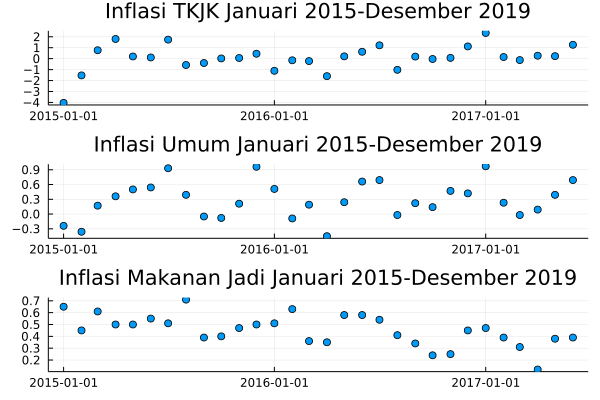

In [5]:
p1 = scatter(vec(x), vec(y1), title= "Inflasi TKJK Januari 2015-Desember 2019", legend=false)
p2 = scatter(vec(x), vec(y2),title= "Inflasi Umum Januari 2015-Desember 2019",legend=false)
p3 = scatter(vec(x), vec(y3), title= "Inflasi Makanan Jadi Januari 2015-Desember 2019",legend=false)
scatter!(p1,p2,p3, layout= (3,1) )

dari scatter plot di atas terlihat bahwa data laju inflasi 3 kategori di Indonesia pada bulan Januari 2015-Desember 2019 cenderung fluktuatif, kelemahan pada scatter plot yaitu tidak semua data laju inflasi ditampilkan pada plot. 

**VEGALITE PLOT DATA 3**

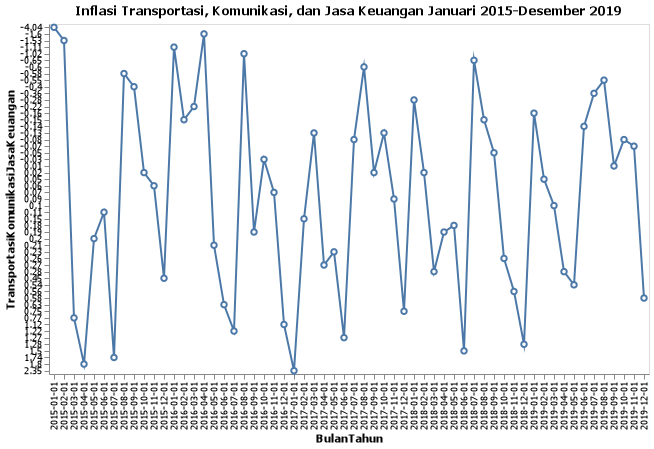

In [6]:
df |> @vlplot(mark={:line, point={filled=false, fill=:white}}, x=:BulanTahun, y=:TransportasiKomunikasiJasaKeuangan,ylim=(-5,5), title ="Inflasi Transportasi, Komunikasi, dan Jasa Keuangan Januari 2015-Desember 2019", width = 600, height =350)

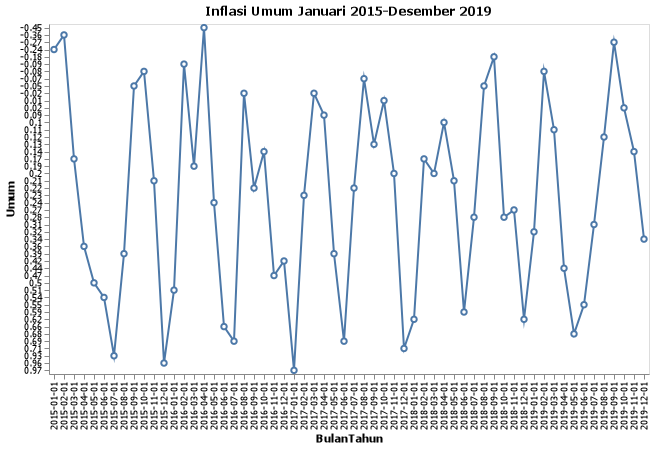

In [17]:
df |> @vlplot(mark={
        :line,
        point={filled=false, fill=:white}
    }, x=:BulanTahun, y=:Umum, title ="Inflasi Umum Januari 2015-Desember 2019", width = 600, height =350)

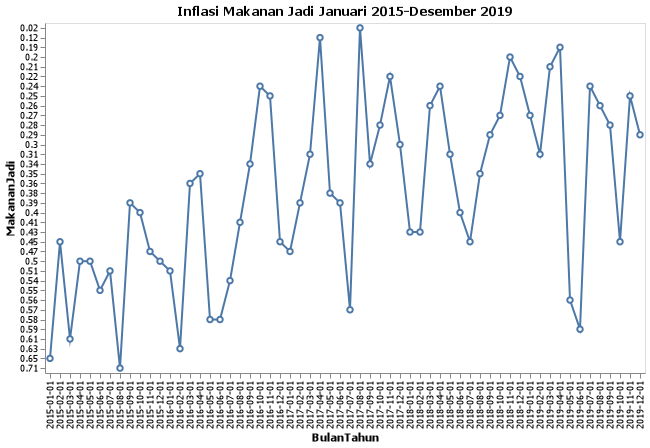

In [18]:
df |> @vlplot(mark={
        :line,
        point={filled=false, fill=:white}
    }, x=:BulanTahun, y=:MakananJadi, title ="Inflasi Makanan Jadi Januari 2015-Desember 2019", width = 600, height =350)

vlplot cenderung lebih jelas dan lebih informatif dibandingkan dengan scatter plot, karena data laju inflasi yang ditampilkan adalah semua data. Namun baik pada vlplot maupun scatter plot menunjukkan pola yang fluktuatif pada data.

In [7]:
df[!,3] = df[!,3]*1;
df[!,4] = df[!,4]*1;
df[!,5] = df[!,5]*1;

# Metode K-Means clustering

Metode clustering pertama yang dilakukan adalah K-Means, kemudian akan dibentuk 3 cluster pada data.

In [8]:
Q1 = df[!, [:TransportasiKomunikasiJasaKeuangan,:Umum, :MakananJadi]]
C = kmeans(Matrix(Q1)', 3) 
insertcols!(df,3,:cluster=>C.assignments)

,No,BulanTahun,cluster,TransportasiKomunikasiJasaKeuangan,Umum,MakananJadi
,Any,Any,Int64,Float64,Float64,Float64
1,1,2015-01-01,1,-4.04,-0.24,0.65
2,2,2015-02-01,1,-1.53,-0.36,0.45
3,3,2015-03-01,3,0.77,0.17,0.61
4,4,2015-04-01,2,1.8,0.36,0.5
5,5,2015-05-01,3,0.2,0.5,0.5
6,6,2015-06-01,3,0.11,0.54,0.55
7,7,2015-07-01,2,1.74,0.93,0.51
8,8,2015-08-01,3,-0.58,0.39,0.71
9,9,2015-09-01,3,-0.4,-0.05,0.39


In [10]:
show(df, allrows=true)

60×6 DataFrame
 Row │ No   BulanTahun  cluster  TransportasiKomunikasiJasaKeuangan  Umum      ⋯
     │ Any  Any         Int64    Float64                             Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1    2015-01-01        1                               -4.04    -0.24   ⋯
   2 │ 2    2015-02-01        1                               -1.53    -0.36
   3 │ 3    2015-03-01        3                                0.77     0.17
   4 │ 4    2015-04-01        2                                1.8      0.36
   5 │ 5    2015-05-01        3                                0.2      0.5    ⋯
   6 │ 6    2015-06-01        3                                0.11     0.54
   7 │ 7    2015-07-01        2                                1.74     0.93
   8 │ 8    2015-08-01        3                               -0.58     0.39
   9 │ 9    2015-09-01        3                               -0.4     -0.05   ⋯
  10 │ 10   2015-10-01        3      

K-Means Clustering :

Cluster 1 menunjukkan laju inflasi rendah, terdapat 5 bulan yang masuk dalam cluster ini.

Cluster 2 menunjukkan laju inflasi tinggi, terdapat 9 bulan yang masuk dalam cluster ini.

Cluster 3 menunjukkan laju inflasi sedang, terdapat 47 bulan yang masuk dalam cluster ini.

dari total 60 bulan pada rentang Januari 2015-Desember 2019, rata-rata laju inflasi di Indonesia sedang.

**Plot Hasil K-Means Clustering**

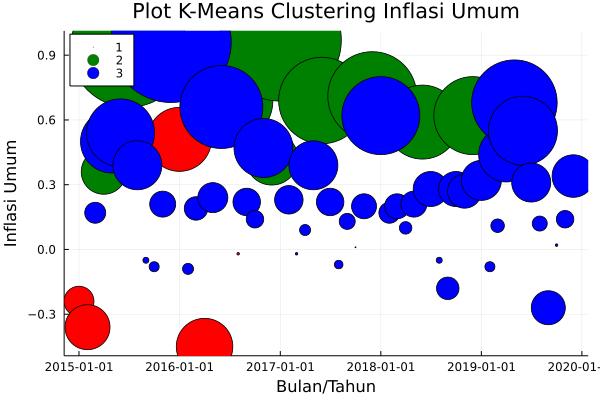

In [13]:
scatter(df.BulanTahun,df.Umum, ms=df.Umum*70, 
    group = df.cluster, 
    color = [:red :green :blue], 
    legend = (0.1,0.95),width = 600, height =350)
xlabel!("Bulan/Tahun")
ylabel!("Inflasi Umum")
title!("Plot K-Means Clustering Inflasi Umum")

Pada kategori laju inflasi umum terlihat bahwa cluster 1 rendah (berwarna merah) memiliki paling sedikit anggota, sedangkan pada cluster 2 tinggi (berwarna hijau) memiliki anggota sedikit lebih banyak dibanding cluster 1.

Pada kategori ini, anggota cluster yang paling banyak didominasi oleh cluster 3 sedang (berwarna biru)

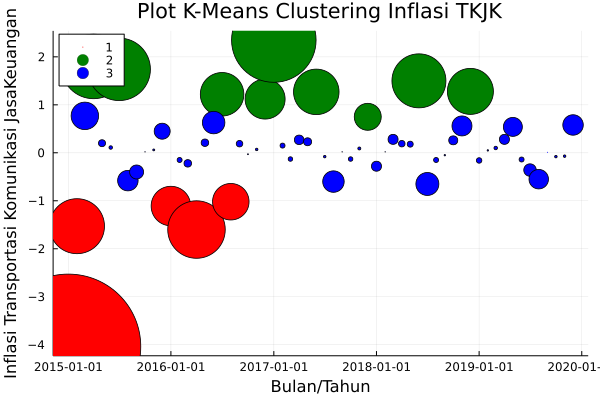

In [14]:
scatter(df.BulanTahun,df.TransportasiKomunikasiJasaKeuangan, ms=df.TransportasiKomunikasiJasaKeuangan*20, 
    group = df.cluster, 
    color = [:red :green :blue], 
    legend = (0.1,0.95),width = 600, height =350)
xlabel!("Bulan/Tahun")
ylabel!("Inflasi Transportasi Komunikasi JasaKeuangan")
title!("Plot K-Means Clustering Inflasi TKJK")

Pada kategori laju inflasi transportasi, komunikasi, dan jasa keunangan terlihat bahwa cluster 1 rendah (berwarna merah) memiliki paling sedikit anggota, sedangkan pada cluster 2 tinggi (berwarna hijau) memiliki anggota sedikit lebih banyak dibanding cluster 1.

Pada kategori ini, anggota cluster yang paling banyak didominasi oleh cluster 3 sedang (berwarna biru)

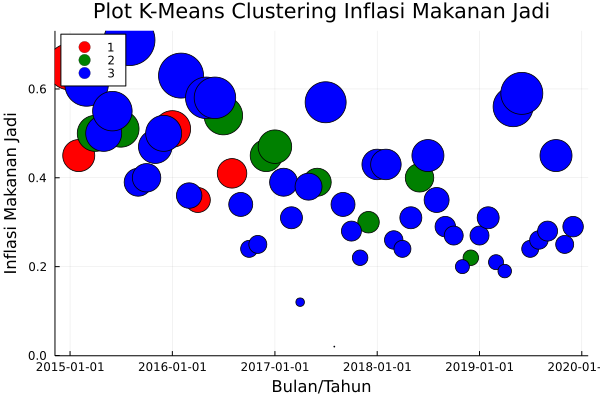

In [15]:
scatter(df.BulanTahun,df.MakananJadi, ms=df.MakananJadi*40, 
    group = df.cluster, 
    color = [:red :green :blue], 
    legend = (0.1,0.95),width = 600, height =350)
xlabel!("Bulan/Tahun")
ylabel!("Inflasi Makanan Jadi")
title!("Plot K-Means Clustering Inflasi Makanan Jadi")

Pada kategori laju inflasi makanan jadi terlihat bahwa cluster 1 rendah (berwarna merah) memiliki paling sedikit anggota, sedangkan pada cluster 2 tinggi (berwarna hijau) memiliki anggota sedikit lebih banyak dibanding cluster 1.

Pada kategori ini, anggota cluster yang paling banyak didominasi oleh cluster 3 sedang (berwarna biru)

# Metode K-Medoids clustering

In [11]:
Q1 = df[!, [:TransportasiKomunikasiJasaKeuangan,:Umum, :MakananJadi]]
D = pairwise(Euclidean(), Matrix(Q1)', Matrix(Q1)',dims=2) 
K = kmedoids(D,3)
insertcols!(df,3,:cluster1=>K.assignments)

,No,BulanTahun,cluster1,cluster,TransportasiKomunikasiJasaKeuangan,Umum
,Any,Any,Int64,Int64,Float64,Float64
1,1,2015-01-01,3,1,-4.04,-0.24
2,2,2015-02-01,3,1,-1.53,-0.36
3,3,2015-03-01,1,3,0.77,0.17
4,4,2015-04-01,2,2,1.8,0.36
5,5,2015-05-01,1,3,0.2,0.5
6,6,2015-06-01,1,3,0.11,0.54
7,7,2015-07-01,2,2,1.74,0.93
8,8,2015-08-01,3,3,-0.58,0.39
9,9,2015-09-01,3,3,-0.4,-0.05


In [12]:
show(df, allrows=true)

60×7 DataFrame
 Row │ No   BulanTahun  cluster1  cluster  TransportasiKomunikasiJasaKeuangan  ⋯
     │ Any  Any         Int64     Int64    Float64                             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1    2015-01-01         3        1                               -4.04  ⋯
   2 │ 2    2015-02-01         3        1                               -1.53
   3 │ 3    2015-03-01         1        3                                0.77
   4 │ 4    2015-04-01         2        2                                1.8
   5 │ 5    2015-05-01         1        3                                0.2   ⋯
   6 │ 6    2015-06-01         1        3                                0.11
   7 │ 7    2015-07-01         2        2                                1.74
   8 │ 8    2015-08-01         3        3                               -0.58
   9 │ 9    2015-09-01         3        3                               -0.4   ⋯
  10 │ 10   2015-10-01         1

K-Means Clustering :

Cluster 1 menunjukkan laju inflasi sedang, terdapat 26 bulan yang masuk dalam cluster ini.

Cluster 2 menunjukkan laju inflasi tinggi, terdapat 9 bulan yang masuk dalam cluster ini.

Cluster 3 menunjukkan laju inflasi rendah, terdapat 25 bulan yang masuk dalam cluster ini.

dari total 60 bulan pada rentang Januari 2015-Desember 2019, rata-rata laju inflasi di Indonesia berada pada cluster sedang dan rendah.

**Plot Hasil K-Medoids Clustering**

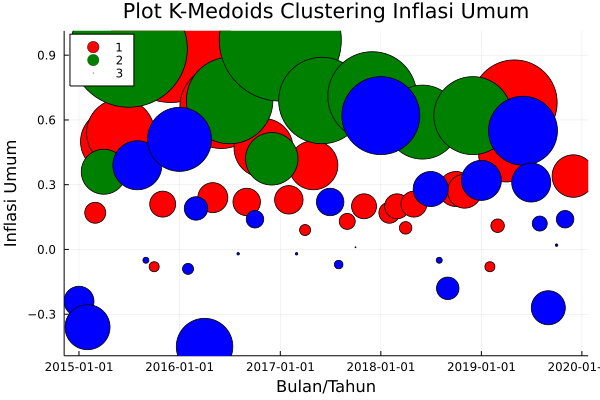

In [17]:
scatter(df.BulanTahun,df.Umum, ms=df.Umum*70, 
    group = df.cluster1, 
    color = [:red :green :blue], 
    legend = (0.1,0.95),width = 600, height =350)
xlabel!("Bulan/Tahun")
ylabel!("Inflasi Umum")
title!("Plot K-Medoids Clustering Inflasi Umum")

Pada kategori laju inflasi umum terlihat bahwa cluster 1 sedang (berwarna merah) memiliki anggota yang cukup banyak, disusul dengan cluster 3 rendah (berwarna biru), sedangkan pada cluster 2 tinggi (berwarna hijau) memiliki anggota paling sedikit.

Pada kategori ini, anggota cluster yang paling banyak didominasi oleh cluster 1 sedang (berwarna merah).

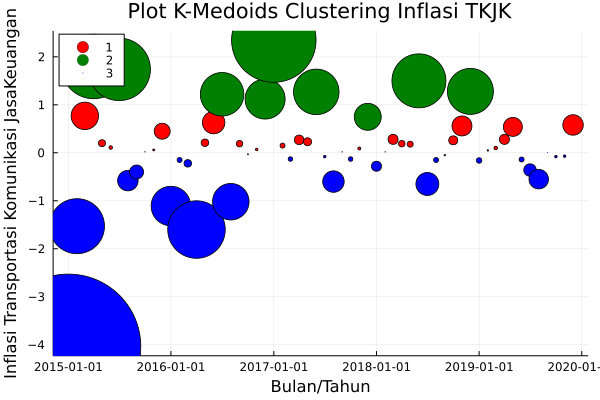

In [18]:
scatter(df.BulanTahun,df.TransportasiKomunikasiJasaKeuangan, ms=df.TransportasiKomunikasiJasaKeuangan*20, 
    group = df.cluster1, 
    color = [:red :green :blue], 
    legend = (0.1,0.95),width = 600, height =350)
xlabel!("Bulan/Tahun")
ylabel!("Inflasi Transportasi Komunikasi JasaKeuangan")
title!("Plot K-Medoids Clustering Inflasi TKJK")

Pada kategori laju inflasi transportasi, komunikasi, dan jasa keuangan terlihat bahwa cluster 1 sedang (berwarna merah) memiliki anggota yang cukup banyak, disusul dengan cluster 3 rendah (berwarna biru), sedangkan pada cluster 2 tinggi (berwarna hijau) memiliki anggota paling sedikit.

Pada kategori ini, anggota cluster yang paling banyak didominasi oleh cluster 1 sedang (berwarna merah).

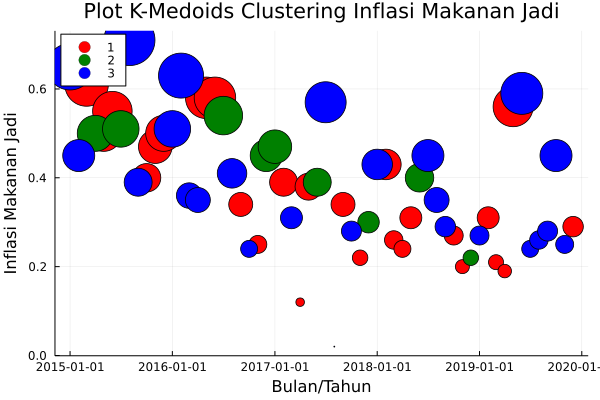

In [19]:
scatter(df.BulanTahun,df.MakananJadi, ms=df.MakananJadi*40, 
    group = df.cluster1, 
    color = [:red :green :blue], 
    legend = (0.1,0.95),width = 600, height =350)
xlabel!("Bulan/Tahun")
ylabel!("Inflasi Makanan Jadi")
title!("Plot K-Medoids Clustering Inflasi Makanan Jadi")

Pada kategori laju inflasi makanan jadi terlihat bahwa cluster 1 sedang (berwarna merah) memiliki anggota yang cukup banyak, disusul dengan cluster 3 rendah (berwarna biru), sedangkan pada cluster 2 tinggi (berwarna hijau) memiliki anggota paling sedikit.

Pada kategori ini, anggota cluster yang paling banyak didominasi oleh cluster 1 sedang (berwarna merah).